In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a*x**b
        
        return y_fit-y

def func_powerlaw(x, a, b):
        return a*x**b

def calc_rsquared(x, y, amplitude, exponent):
    yhat = func_powerlaw(x, amplitude, exponent)

    return r2_score(y, yhat)

In [3]:
dataBase_path = r'./'
dataBase_file = r'UUVDatabase.xlsx'
biological_file = r'biological_COT_Data.ods'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
convDF = pd.read_excel(data_path, sheet_name = 'Propeller')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

data_path = Path(dataBase_path, biological_file)
bioDF = pd.read_excel(data_path, sheet_name='Videler and Nolet')
bio_kinematics = pd.read_excel(data_path, sheet_name='Videler Kinematic')
bioDF = bioDF.sort_values('Weight [kg]')

In [5]:
conv_cot = convDF[convDF['COTopt [J/m]'].notnull()]
bcf_cot = bcfDF[bcfDF['COTopt [J/m]'].notnull()]
mpf_cot = mpfDF[mpfDF['COTopt [J/m]'].notnull()]
lift_cot = liftDF[liftDF['COTopt [J/m]'].notnull()]

# sort the column values in ascending order
conv_cot = conv_cot.sort_values('Weight [kg]')
bcf_cot = bcf_cot.sort_values('Weight [kg]')
mpf_cot = mpf_cot.sort_values('Weight [kg]')
lift_cot = lift_cot.sort_values('Weight [kg]')

# drop all rows with nan values
conv_cot.dropna(subset=['Weight [kg]'], inplace=True)
bcf_cot.dropna(subset=['Weight [kg]'], inplace=True)
mpf_cot.dropna(subset=['Weight [kg]'], inplace=True)
lift_cot.dropna(subset=['Weight [kg]'], inplace=True)

In [6]:
# break up the data frame into perspective locomotion modes
bio_modes = bioDF['Trophic Level'].unique()

bio_dfs = [bioDF[bioDF['Trophic Level']==mode] for mode in bio_modes]

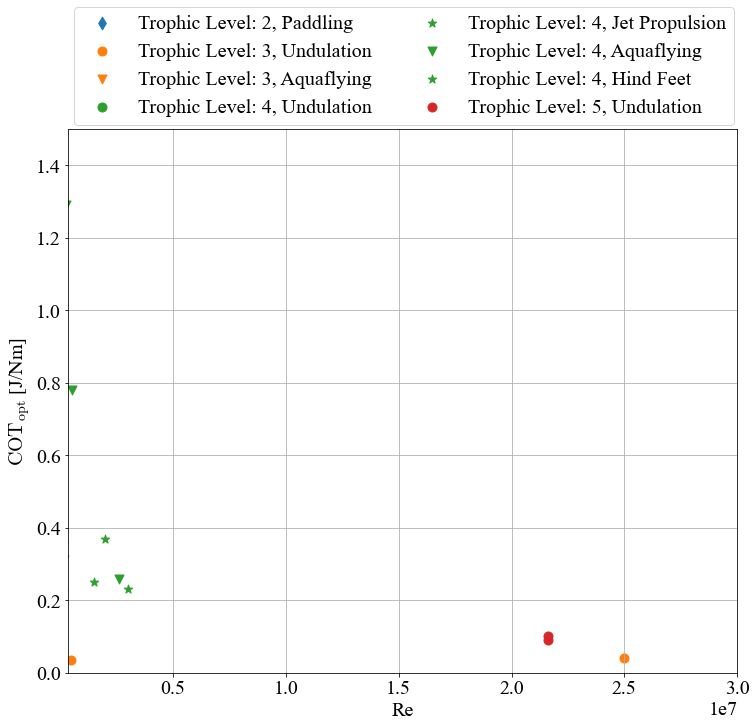

In [24]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')

markers = ['o', 'v', '*', '^', 'd']
marker_colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

for i, mode in enumerate(bio_modes):
        data = bio_dfs[i].sort_values(by=['Re'])
        
        loco_modes = data["Mode"].unique()

        for j, locomotion in enumerate(loco_modes):
                df = data[data['Mode']==locomotion]
                if locomotion == 'Paddling':
                        markers = 'd'
                elif locomotion == 'Undulation':
                        markers = 'o'
                elif locomotion == 'Aquaflying':
                        markers = 'v'
                else:
                        markers = '*'
                ax1.scatter(df['Re'].values, df['COTopt [J/Nm]'].values, color=marker_colors[i], marker=markers, label="Trophic Level: " + str(mode) + ", " + locomotion)


ax1.set_xlabel('Re')
ax1.set_ylabel('$\mathrm{COT_{opt}}$ [J/Nm]')
ax1.legend(ncol=2, loc=4, bbox_to_anchor=(1.01, 0.99))

ax1.set_xlim([3.5e5, 3e7])
ax1.set_ylim([0, 1.5])
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.grid()
fig1.savefig('cot_trophic_levels_linlin_3-4-5.pdf', facecolor='w', dpi=300, bbox_inches='tight')